In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/try5/finetune/*.csv")):
    results.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results = pd.concat(results).set_index("index").sort_index()
results

,P1,P2,P3,P4,truth
index,,,,,
0,1.006039e-12,6.983297e-12,1.917172e-10,1.000000e+00,4
1,4.139938e-08,2.845335e-08,9.999997e-01,6.825603e-08,3
2,9.999992e-01,3.256310e-07,3.689883e-07,0.000000e+00,1
3,2.789468e-10,1.103256e-09,2.845335e-08,1.000000e+00,4
4,8.592167e-10,9.999997e-01,2.335593e-09,2.382370e-07,2
...,...,...,...,...,...
210,1.265528e-07,1.511457e-08,9.924226e-01,7.577238e-03,3
211,1.760343e-06,9.999977e-01,4.450844e-07,1.507969e-09,2
212,2.510908e-08,7.734142e-08,9.999644e-01,3.535625e-05,3


In [3]:
results[["P1", "P2", "P3", "P4"]].sum(axis=1).describe()

count    2.150000e+02
mean     9.999999e-01
std      8.774965e-08
min      9.999993e-01
25%      9.999999e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

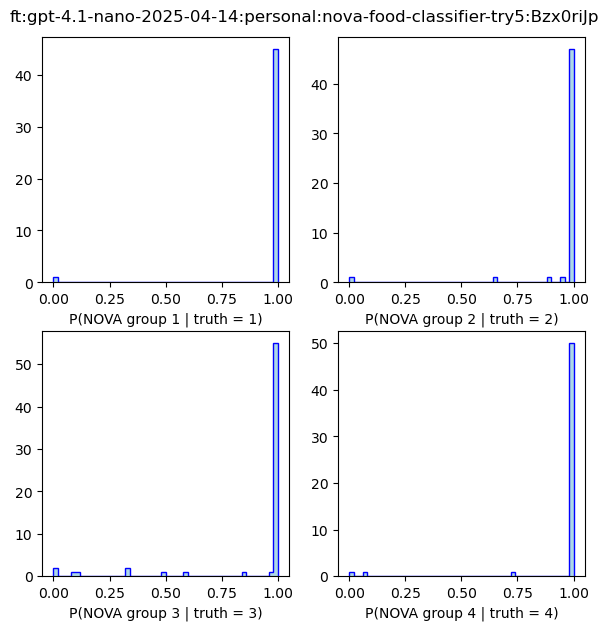

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))

ax1.hist(results.query("truth == 1")["P1"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax1.set_xlabel("P(NOVA group 1 | truth = 1)")

ax2.hist(results.query("truth == 2")["P2"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax2.set_xlabel("P(NOVA group 2 | truth = 2)")

ax3.hist(results.query("truth == 3")["P3"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax3.set_xlabel("P(NOVA group 3 | truth = 3)")

ax4.hist(results.query("truth == 4")["P4"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax4.set_xlabel("P(NOVA group 4 | truth = 4)")

fig.suptitle("ft:gpt-4.1-nano-2025-04-14:personal:nova-food-classifier-try5:Bzx0riJp", y=0.92)

None